In [1]:
from utils.analysis.tools import simDir, periodicity_plot
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils import plot
from utils.plot import _FIGURE_DIR, get_size_inches, _CM
import string
from scipy.signal import find_peaks
import matplotlib.gridspec as gridspec

In [2]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240718_LowDegradationHighInteractionLowAccuracy/M1_1.0_b_-0.25_g_-0.5_c_0.4_k_0.05_kp_0.0137791_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_2000.0_kd_0.04")
sim.run(end=-1); sim.condensate(); sim.rna(); sim.periodicity(tinit=18000);
sim.time = sim.time[:sim.com.shape[0]]

In [3]:
cmap = mpl.colormaps['Set1']
primary = "black"
secondary = cmap(8)
accent_negative = cmap(0)
accent_positive = cmap(1)

In [4]:
t = 17000
h = 5
w = 50
start = np.argmin((sim.time - t)**2)
peaks = find_peaks(sim.com[start:,0],height=h,width=w)[0]+start
troughs = find_peaks(-sim.com[start:,0],height=-h,width=w)[0]+start

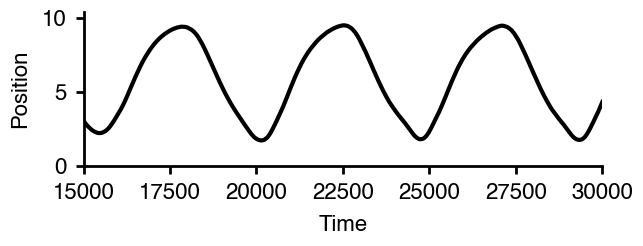

In [5]:
height = 8.5 * 0.3
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8.5*_CM,height*1*_CM)
ax.plot(sim.time,sim.com[:,0],color=primary)
ax.set_xlabel("Time")
ax.set_ylabel("Position")
ax.set_xlim((15000,30000))
ax.set_yticks([0,5,10])
# ax = ax.twinx()
# ax.plot(sim.time,sim.rna_amount,color=accent_positive)
# fig.savefig(_FIGURE_DIR / "Fig5_COM.pdf",bbox_inches='tight')

In [6]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240812_LowDegradationNormalInteractionLowAccuracy/M1_1.0_b_-0.25_g_-0.1_c_0.06_k_0.05_kp_0.0137791_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_12000.0_kd_0.04")
sim.run(); sim.condensate(); sim.rna()

In [7]:
t = 17000
h = 5
w = 50
start = np.argmin((sim.time - t)**2)
peaks = find_peaks(sim.com[start:,0],height=h,width=w)[0]+start
troughs = find_peaks(-sim.com[start:,0],height=-h,width=w)[0]+start

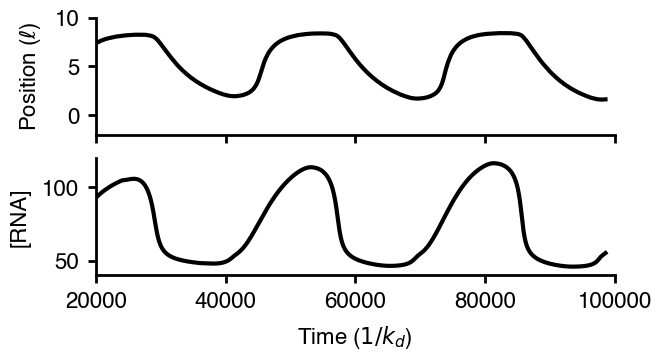

In [8]:
height = 8.5 * 0.25
fig, ax = plt.subplots(2,1,sharex=True)
fig.set_size_inches(8.5*_CM,height*2*_CM)
ax[0].plot(sim.time,sim.com[:,0],color=primary)
# ax[0].set_xlabel("Time")
ax[0].set_ylabel("Position ($\ell$)")
ax[0].set_yticks([0,5,10])
ax[0].set_ylim([-2,10])
ax[0].tick_params(labelbottom=False)    
ax[1].plot(sim.time,sim.rna_amount,color=primary)
ax[1].set_xlabel("Time ($1/k_d$)")
ax[1].set_ylabel("[RNA]")
ax[1].set_ylim([40,120])
ax[0].set_xlim(left=20000,right=100000)
# ax.annotate(f'{uc}', xy=(-0.2,1), weight='bold', xycoords="axes fraction",
#             bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
fig.savefig(_FIGURE_DIR / "Fig5_COM.pdf",bbox_inches='tight')

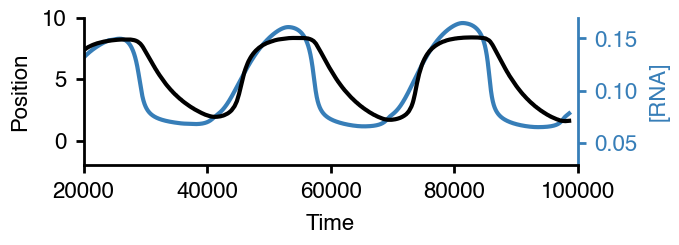

In [9]:
height = 8.1 * 0.3
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8.1*_CM,height*1*_CM)
ax.plot(sim.time,sim.com[:,0],color=primary)
ax.set_xlabel("Time")
ax.set_ylabel("Position")
ax.set_yticks([0,5,10])
ax.set_ylim([-2,10])
ax2 = ax.twinx()
ax2.plot(sim.time,sim.rna_amount/np.sum(sim.geometry.mesh.cellVolumes),color=accent_positive)
ax.set_zorder(ax2.get_zorder()+1)
ax.set_frame_on(False)
ax2.set_ylabel("[RNA]")
ax2.set_ylim([20/np.sum(sim.geometry.mesh.cellVolumes),120/np.sum(sim.geometry.mesh.cellVolumes)])
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(accent_positive)
ax2.tick_params(axis='y', colors=accent_positive)
ax2.yaxis.label.set_color(accent_positive)
ax.set_xlim(left=20000,right=100000)
# ax.annotate(f'{uc}', xy=(-0.2,1), weight='bold', xycoords="axes fraction",
#             bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
fig.savefig(_FIGURE_DIR / "Fig5_COM.pdf",bbox_inches='tight')

In [10]:

# fig.savefig(_FIGURE_DIR / "Fig5_RNA.pdf",bbox_inches='tight')

In [11]:
def shape(xy,c,ax,cmap="Blues",vmin=None,vmax=None,xlim=None,ylim=None, levels=None):
    x = xy[:,0]
    y = xy[:,1]
    ax.tricontourf(x,y,c,cmap=cmap,
                   vmin=vmin,vmax=vmax,levels=levels)
    ax.set_aspect(1)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

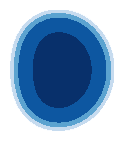

In [12]:
time = peaks[-1]
fig,ax = plt.subplots()
fig.set_size_inches(2*_CM,2*_CM)
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
shape(xy,conc,ax,vmin=4,vmax=4.5,levels=3)
ax.scatter(x=0, y=0, s=30, color='green',marker=".")
# ax.set_xlim(left=-1)
plt.savefig(_FIGURE_DIR/"Fig5_DropletPeak")

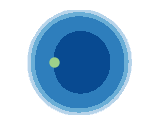

In [13]:
time = troughs[-1]
fig,ax = plt.subplots()
fig.set_size_inches(2*_CM,2*_CM)
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
shape(xy,conc,ax,levels=3)
ax.set_xlim(left=-3)
ax.scatter(x=0, y=0, s=30, color='#9DD08A',marker=".")
plt.savefig(_FIGURE_DIR/"Fig5_DropletTrough")

In [14]:
sim.concentration_profile[2][time]

array([3.5080602, 3.5085266, 3.50794  , ..., 3.5079372, 3.5078752,
       3.507874 ], dtype=float32)

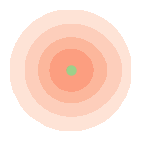

In [15]:
time = troughs[-1]
fig,ax = plt.subplots()
fig.set_size_inches(2*_CM,2*_CM)
radius=8
mask = np.sum(sim.xy**2,axis=1)<radius**2
xy = sim.xy[mask,:]
conc = sim.concentration_profile[1][time][mask]
shape(xy,conc,ax,levels=3,cmap="Reds",vmin=sim.plotting_range[1][0],vmax=sim.plotting_range[1][1])
ax.scatter(x=0, y=0, s=30, color='#9DD08A',marker=".")
plt.savefig(_FIGURE_DIR/"Fig5_DropletTrough")

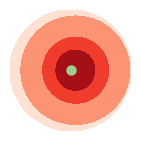

In [16]:
time = peaks[-1]
fig,ax = plt.subplots()
fig.set_size_inches(2*_CM,2*_CM)
radius=8
mask = np.sum(sim.xy**2,axis=1)<radius**2
xy = sim.xy[mask,:]
conc = sim.concentration_profile[1][time][mask]
shape(xy,conc,ax,levels=3,cmap="Reds",vmin=sim.plotting_range[1][0],vmax=sim.plotting_range[1][1])
ax.scatter(x=0, y=0, s=30, color='#9DD08A',marker=".")
plt.savefig(_FIGURE_DIR/"Fig5_DropletTrough")